In [2]:
#importing the essential libraries needed to work with the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing and reading the needed dataset and since some of the columns are not in the utf-8 encoding form, the encoding was specified as ISO-8859-1
glob= pd.read_csv("globalterrorismdb.csv",encoding = "ISO-8859-1")
glob.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#finding more statistical meaning about the dataset using the describe function
glob.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#finding the number of rows and columns in the dataset using the shape attribute
glob.shape

(181691, 135)

In [6]:
# Renaming Columns 
glob.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    }, inplace=True)

In [7]:
#selecting the necessary columns for the analysis
glob = glob[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [8]:
glob.shape

(181691, 20)

In [9]:
#checking for empty columns and summing them
glob.isnull().sum().unique

<bound method Series.unique of eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
success             0
dtype: int64>

In [10]:
#filling the various empty spaces with unknowwn and 0
glob['state'] = glob['state'].fillna('Unknown')
glob['city'] = glob['city'].fillna('Unknown')
glob['latitude'] = glob['latitude'].fillna(0)
glob['longitude'] = glob['longitude'].fillna(0)
glob['Killed'] = glob['Killed'].fillna(0)
glob['Wounded'] = glob['Wounded'].fillna(0)
glob['Target'] = glob['Target'].fillna('Unknown')
glob['Summary'] = glob['Summary'].fillna('Unknown')
glob['Motive'] = glob['Motive'].fillna('Unknown')
glob.isnull().sum()

eventid        0
Year           0
Month          0
Day            0
Country        0
Region         0
state          0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
success        0
dtype: int64

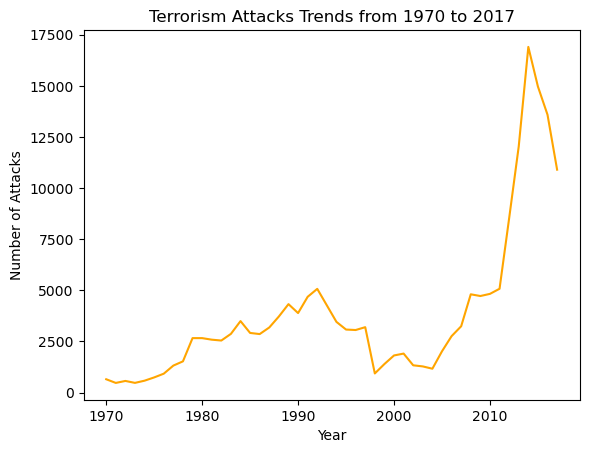

In [11]:
# Grouping the DataFrame by 'Year' and calculating the count of attacks in each year
year_attacks = glob.groupby('Year').size().reset_index(name='count')

# Creating a line plot to visualize the trend of attacks over the years
sns.lineplot(x='Year', y='count', data=year_attacks, color='orange')

# Adding labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks Trends from 1970 to 2017")

# Displaying the plot
plt.show()

In [12]:
# Grouping the DataFrame by 'Year' and 'Region' and calculating the count of attacks in each year and region
year_attacks_region = glob.groupby(['Year', 'Region']).size().reset_index(name='count')

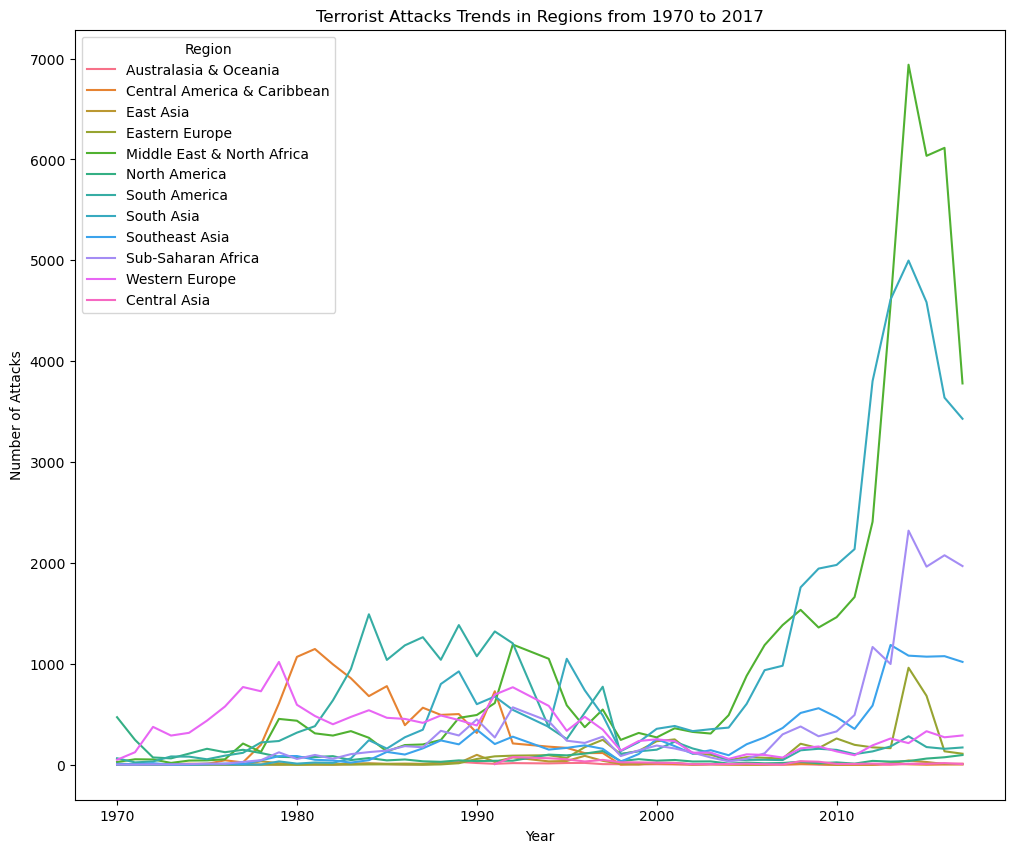

In [13]:
# Creating a line plot with different colors for each region
plt.figure(figsize=(12, 10))
sns.lineplot(x='Year', y='count', hue='Region', data=year_attacks_region)

# Adding a title and labels to the plot
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

# Displaying the plot
plt.show()

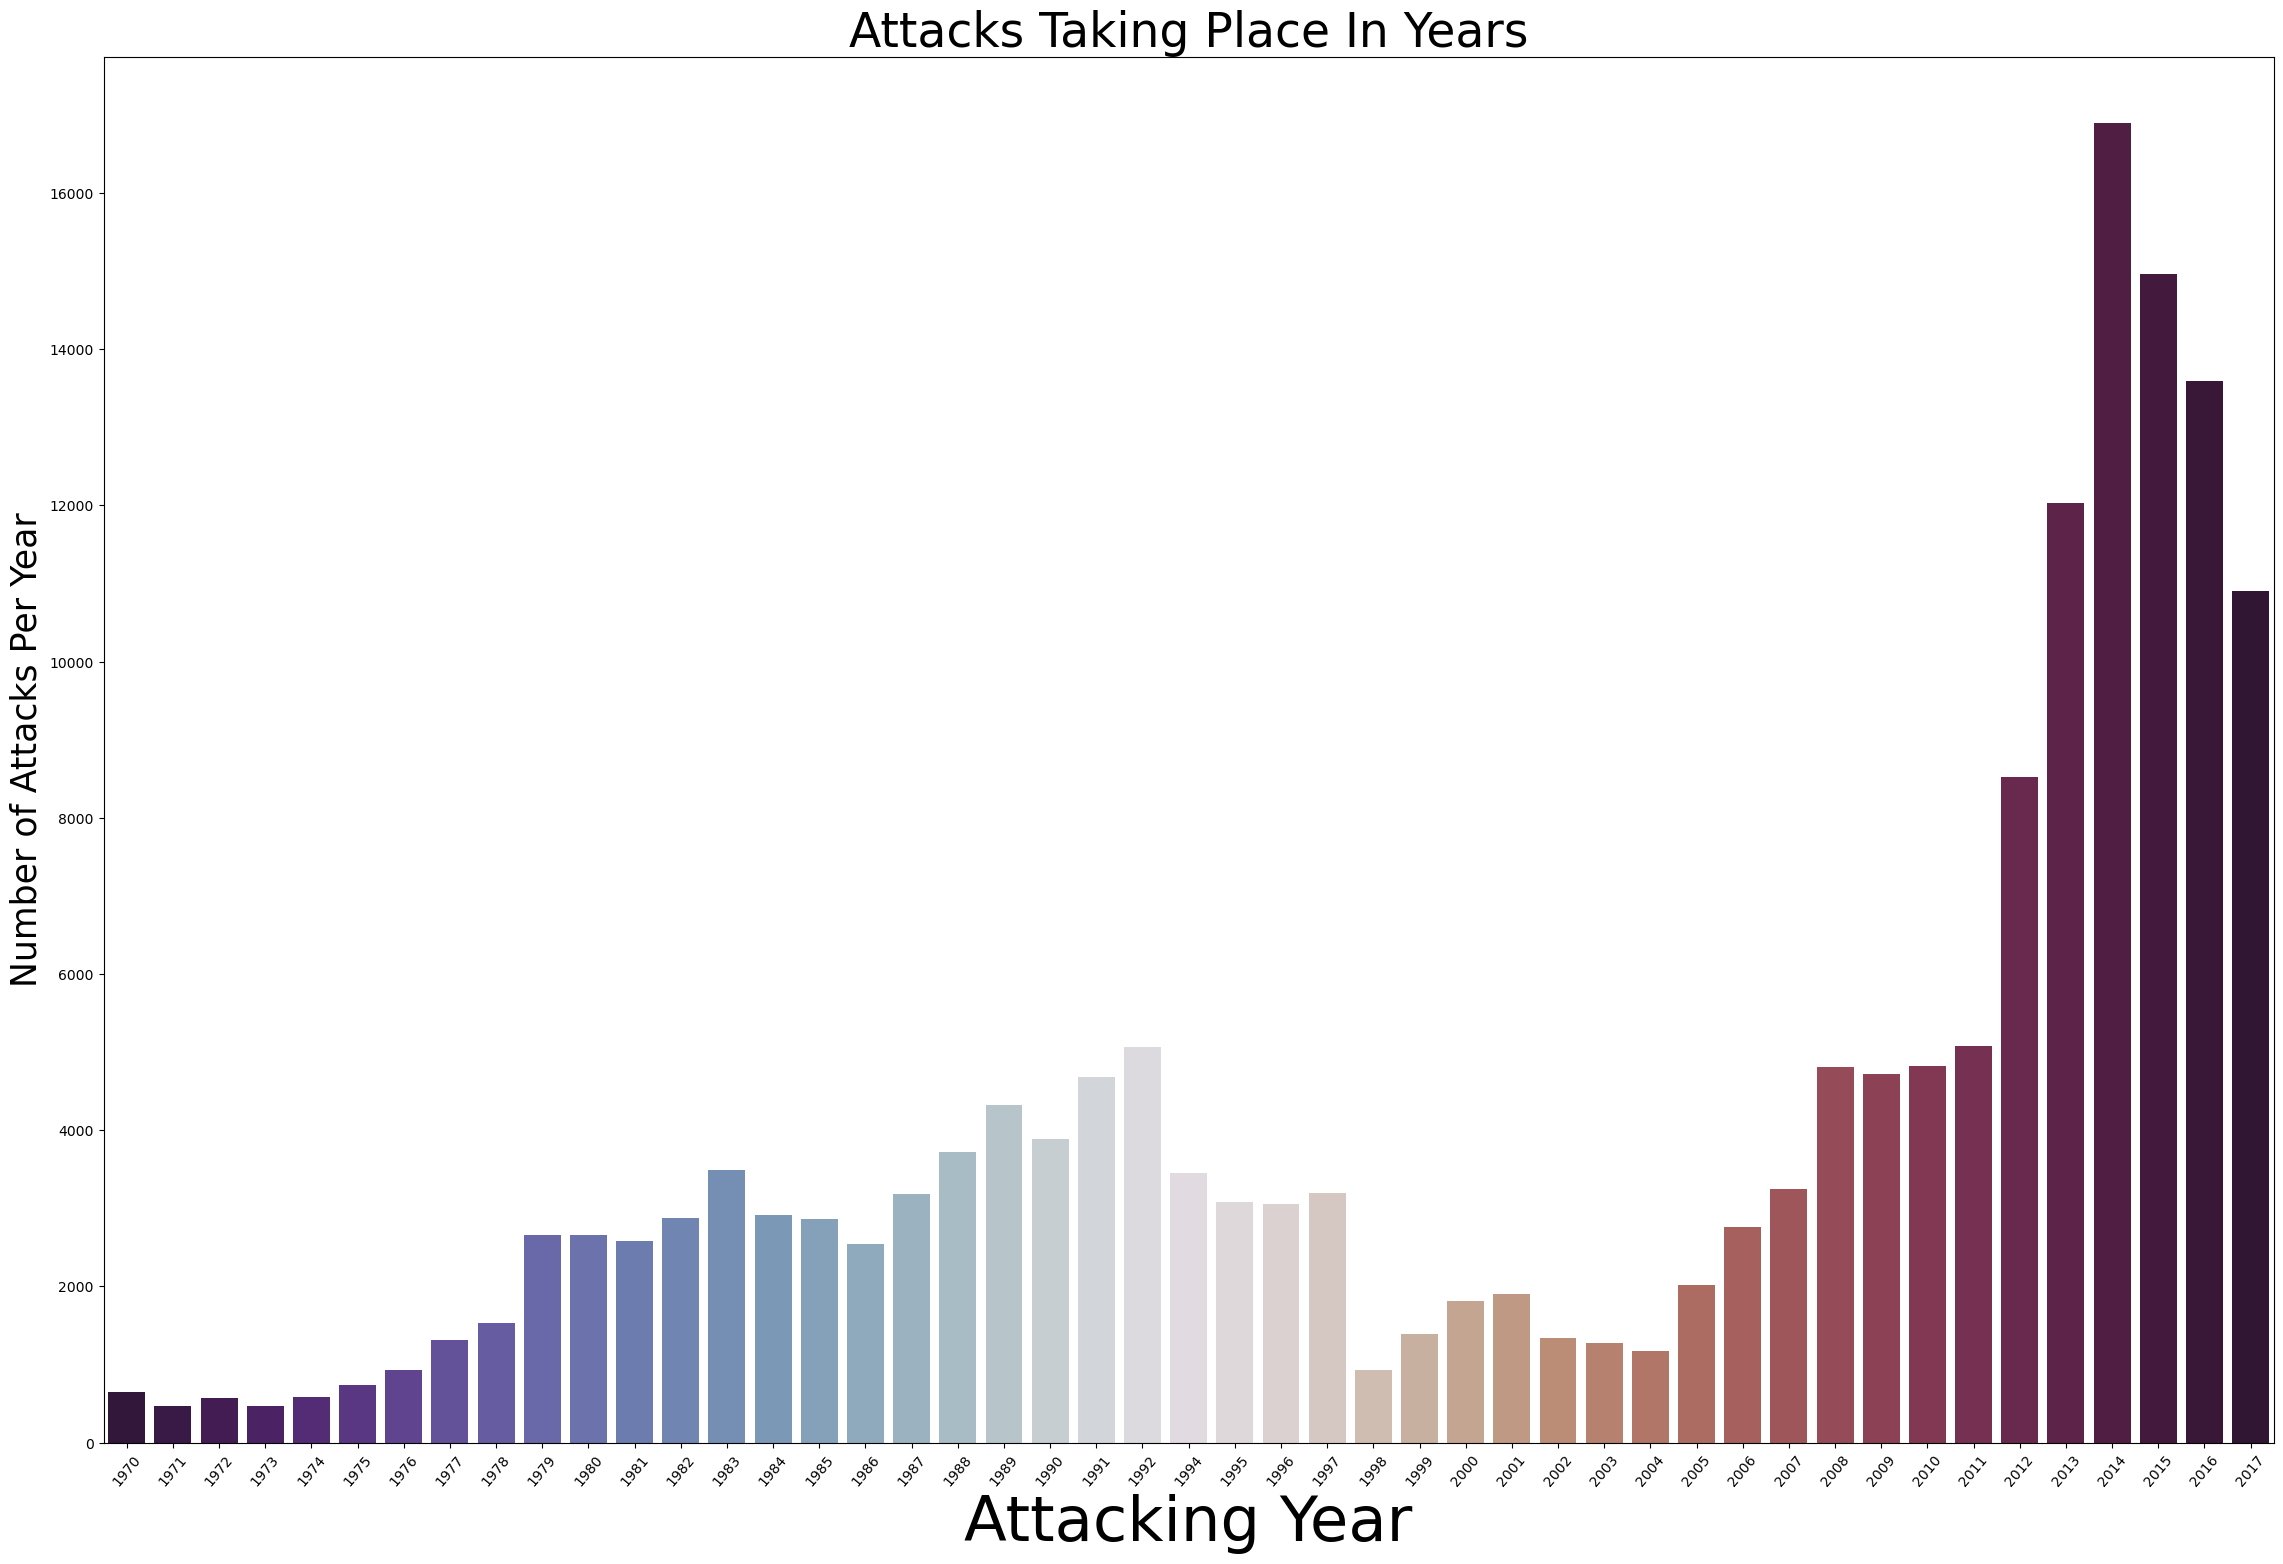

In [14]:
# Get unique years from the 'Year' column
year = glob['Year'].unique()

# Count the number of attacks for each year and sort by year
years_count = glob['Year'].value_counts(dropna=False).sort_index()

# Create a figure with a specific size
plt.figure(figsize=(28, 18))

# Create a bar plot to visualize the number of attacks per year
sns.barplot(x=year, y=years_count, palette='twilight_shifted')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50)

# Add a title and labels to the plot
plt.title('Attacks Taking Place In Years', fontsize=34)
plt.xlabel('Attacking Year', fontsize=45)
plt.ylabel('Number of Attacks Per Year', fontsize=25)

# Display the plot
plt.show()

Looking at the chart above, the year that recorded the lowest number of attack was in the year 1973 and the year that recoreded the highest number of attacks was in 2014.


In [15]:
new_country = glob[['Year','Country']]
new_country.head()

,Year,Country
0,1970,Dominican Republic
1,1970,Mexico
2,1970,Philippines
3,1970,Greece
4,1970,Japan


In [16]:
# new = new_country.groupby(['Country'])
# new.value_counts()
glob['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

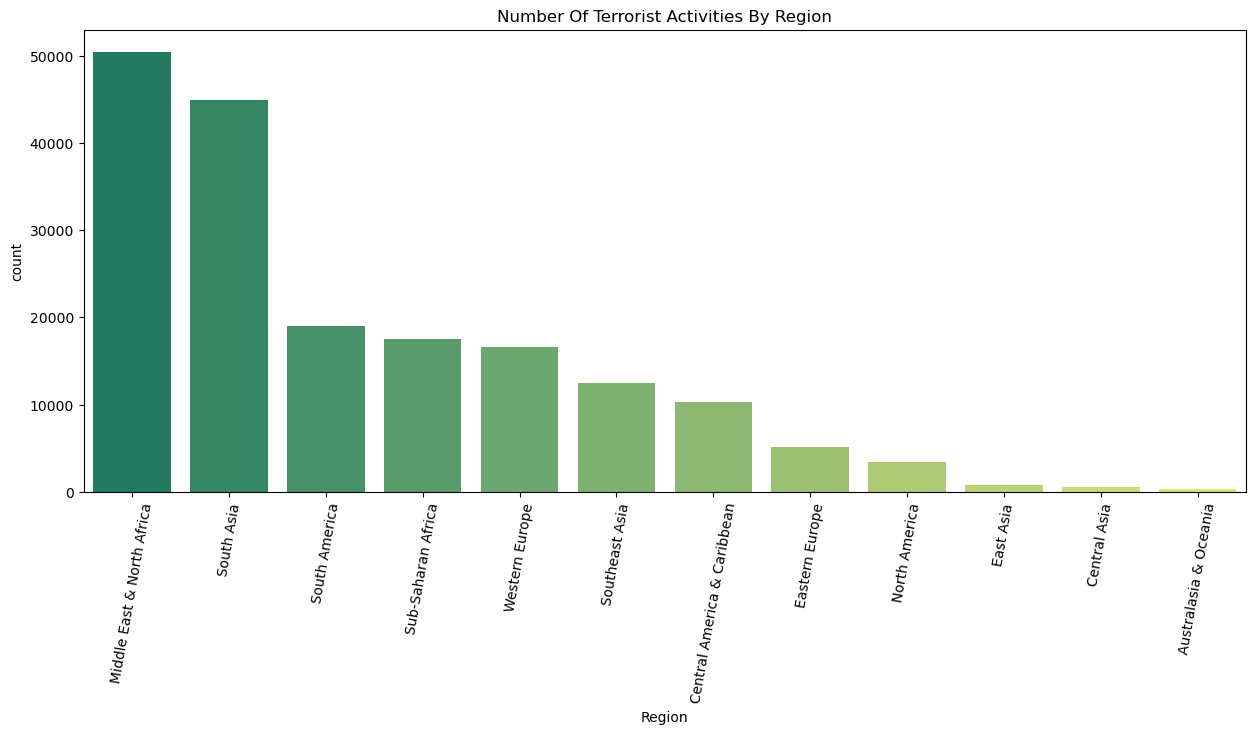

In [17]:
# Create a subplot with a specific size
plt.subplots(figsize=(15, 6))

# Create a countplot with the 'Region' column from the 'df' DataFrame
# Set the color palette to 'magma'
# Specify the order of the bars based on the value counts of 'Region'
sns.countplot(x='Region', data=glob, palette='summer', order=glob['Region'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=80)

# Add a title to the plot
plt.title('Number Of Terrorist Activities By Region')

# Display the plot
plt.show()

the above shows that the middle east and North Africa has the highest count of terrorist activities and Australia & Oceania has the least count of number of terrorist activities South Asia also had a rise in the number of Terrorist attacks since there was alot of figth for political power.

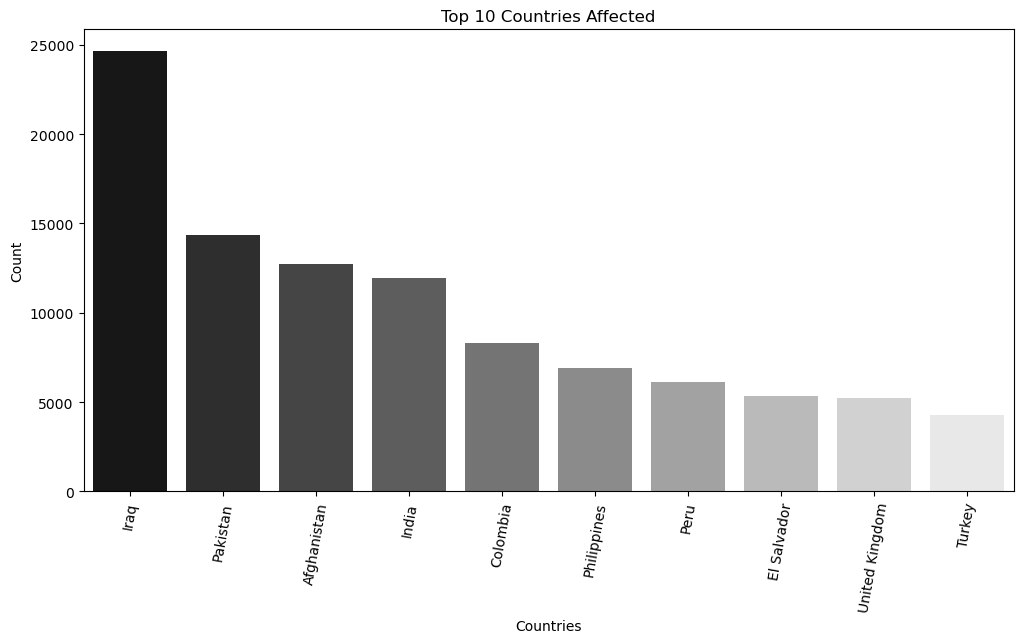

In [18]:
# Create a subplot with a specific size
plt.subplots(figsize=(12, 6))

# Get the top 10 countries with the highest attack counts
top = glob['Country'].value_counts()[:10].to_frame().reset_index()
top.columns = ['Country', 'Attacks_Counts']

# Create a bar plot using the 'Country' and 'Attacks_Counts' columns from the 'top' DataFrame
# Set the color palette to 'magma'
sns.barplot(x='Country', y='Attacks_Counts', data=top, palette='gist_gray')

# Add a title to the plot
plt.title('Top 10 Countries Affected')

# Add labels to the x-axis and y-axis
plt.xlabel('Countries')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=80)

# Display the plot
plt.show()

With the data above, it shows the top 10 countries that were most affected and it took a decrease gradually till Turkey having the least number of counts of been affected

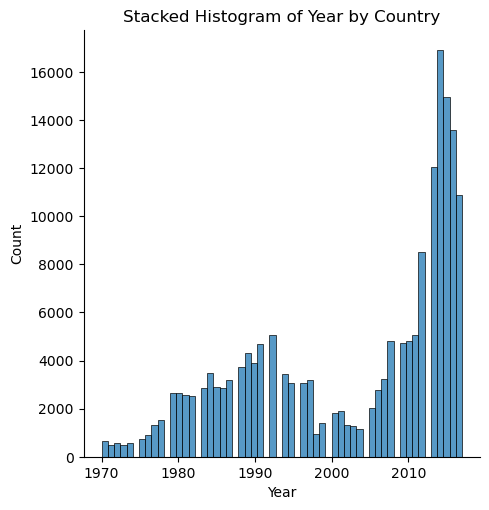

In [19]:
# creating a Stack histogram based on the caterogircal data called Country 
sns.displot(data=glob, x="Year", kind="hist", palette="Wistia_r", multiple="stack")

# Add a title to the plot
plt.title("Stacked Histogram of Year by Country")

# Display the plot
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Baghdad'),
  Text(2, 0, 'Karachi'),
  Text(3, 0, 'Lima'),
  Text(4, 0, 'Mosul'),
  Text(5, 0, 'Belfast'),
  Text(6, 0, 'Santiago'),
  Text(7, 0, 'Mogadishu'),
  Text(8, 0, 'San Salvador'),
  Text(9, 0, 'Istanbul'),
  Text(10, 0, 'Athens'),
  Text(11, 0, 'Bogota'),
  Text(12, 0, 'Kirkuk'),
  Text(13, 0, 'Beirut'),
  Text(14, 0, 'Medellin'),
  Text(15, 0, 'Benghazi'),
  Text(16, 0, 'Peshawar'),
  Text(17, 0, 'Quetta'),
  Text(18, 0, 'Guatemala City'),
  Text(19, 0, 'Baqubah')])

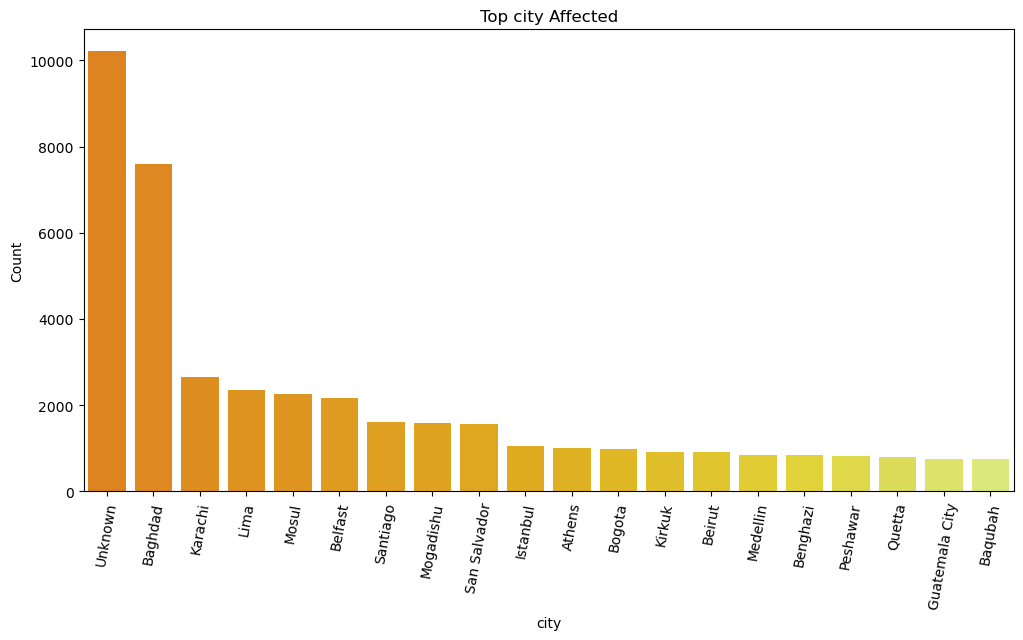

In [20]:
plt.subplots(figsize=(12,6))
top=glob['city'].value_counts()[:20].to_frame().reset_index()
top.columns= ['city','Attacks_Counts']
sns.barplot(x='city',y='Attacks_Counts', data= top, palette='Wistia_r')
plt.title('Top city Affected')
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks(rotation=80)

cities that had formaerly been empty which was replaced with 'Unknown' had the highest count of cities that are most affected by the terrorist followed by the Baghdad city and Baqubah city recoreded the least affected city to be affected

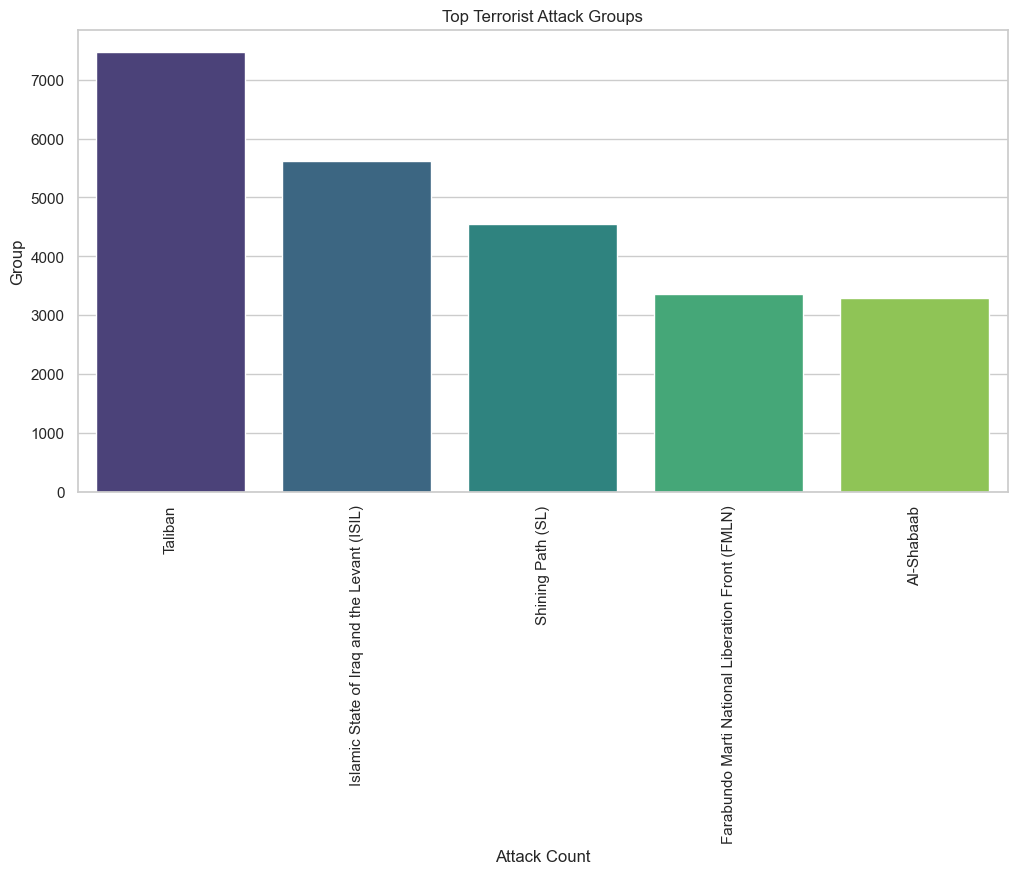

In [21]:
group_counts = glob['Group'].value_counts()
sort = group_counts.sort_values(ascending=False)

# Select the top 5 most frequent groups
sort = sort.iloc[1:]
top_5 = sort.head(5)





# Plotting top 5 terrorists groups

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5.index, y=top_5.values, palette="viridis")
plt.title('Top Terrorist Attack Groups')
plt.xlabel('Attack Count')
plt.ylabel('Group')
plt.xticks(rotation = 90)
plt.show()

Taliban is the most active terrorist group around the world

In [23]:
count_data = glob.groupby('Year').size().reset_index(name='count')
count_data

,Year,count
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581
5,1975,740
6,1976,923
7,1977,1319
8,1978,1526
9,1979,2662


In [25]:
# Calculating the total number of attacks
sum_of_attacks = count_data['count'].sum()
print('Total number of attacks all over the world:', sum_of_attacks)


Total number of attacks all over the world: 181691


In [28]:
# Calculating the success rate
success_rate = glob.groupby(['success']).size().reset_index(name='count')
success_rate['percentage'] =  success_rate['count']/sum_of_attacks *100
success_rate

,success,count,percentage
0,0,20059,11.040173
1,1,161632,88.959827
